In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
import torch
import torch.nn as nn

In [ ]:
path="NFLX.csv"
df = pd.read_csv(path)
print(df.head())
closed_prices = df["Close"]

         Date        Open        High         Low       Close   Adj Close  \
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4  2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   

     Volume  
0  13181000  
1  17284900  
2  17948100  
3  11670000  
4   9689000  


In [ ]:
seq_len = 15

In [ ]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()


In [ ]:
X=[]
Y=[]

In [ ]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])


In [ ]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]


In [ ]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()


In [ ]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [ ]:
model = Model(1,64)

In [ ]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
num_epochs=100

In [ ]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())


10 epoch loss 0.19186826
20 epoch loss 0.06738672
30 epoch loss 0.054185197
40 epoch loss 0.04336668
50 epoch loss 0.024419487
60 epoch loss 0.0064065093
70 epoch loss 0.00536999
80 epoch loss 0.0042615063
90 epoch loss 0.0034916976


In [ ]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [ ]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())


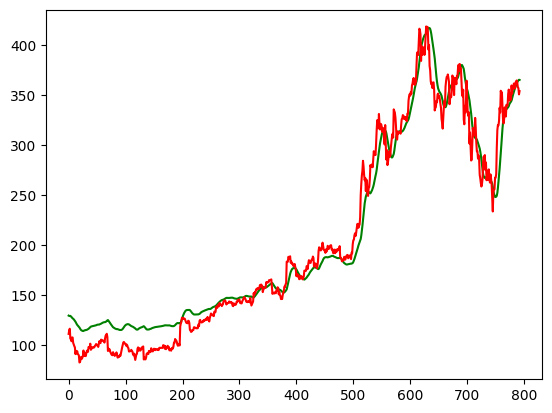

In [ ]:
plt.plot(pred.squeeze(),color="green",label="predicted")
plt.plot(real.squeeze(),color="red",label="real")
plt.show()